In [1]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
import json
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)

In [3]:
sigmas = torch.linspace(0.1,2.0,39)

ipcs=torch.tensor(())
for sigma in sigmas:
    ipc=[]
    fn = r"20N_3din_%.2f_s"%(sigma)
    
    ipc = torch.load(f"./experiments/ipcs/{fn}_ipc.pt",weights_only=False)
    capacities = ipc.val
    totCapacity = float(torch.sum(capacities))
    print("totoal capacity:",totCapacity)
    
    c_1st = ipc.ipc_by_degree(1)
    c_2nd = ipc.ipc_by_degree(2)
    c_3rd = ipc.ipc_by_degree(3)
    c_4th = ipc.ipc_by_degree(4)
    c_5th = ipc.ipc_by_degree(5)
    c_6th = ipc.ipc_by_degree(6)
    c_7th = ipc.ipc_by_degree(7)
    
    """
    print("2nd order ipc:",float(c_2nd))
    print("3rd order ipc:",float(c_3rd))
    print("4th order ipc:",float(c_4th))
    print("5th order ipc:",float(c_5th))
    """
    ipc_by_deg = torch.tensor([c_1st,c_2nd,c_3rd,c_4th,c_5th,c_6th,c_7th])
    ipcs = torch.cat((ipcs,ipc_by_deg.unsqueeze(0)),0)



totoal capacity: 19.331826450237262
totoal capacity: 19.223298719917185
totoal capacity: 19.223435593043675
totoal capacity: 19.246309739845252
totoal capacity: 19.258479638786472
totoal capacity: 19.247150020397772
totoal capacity: 19.22370575936484
totoal capacity: 19.192644937030714
totoal capacity: 19.15187007795601
totoal capacity: 19.10156907701135
totoal capacity: 19.05957429665775
totoal capacity: 19.019489388526782
totoal capacity: 18.979776021158575
totoal capacity: 18.93723954148974
totoal capacity: 18.905195043988172
totoal capacity: 18.88227862306627
totoal capacity: 18.853649164494424
totoal capacity: 18.82533012009479
totoal capacity: 18.800501595053678
totoal capacity: 18.773507450936055
totoal capacity: 18.741986063164216
totoal capacity: 18.712939303717224
totoal capacity: 18.68782524857111
totoal capacity: 18.660539680235193
totoal capacity: 18.644396041599883
totoal capacity: 18.62514272162733
totoal capacity: 18.613143294717972
totoal capacity: 18.598848196975965
t

In [6]:
#torch.save(ipcs,"./experiments/ipcs_sigma_3din")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


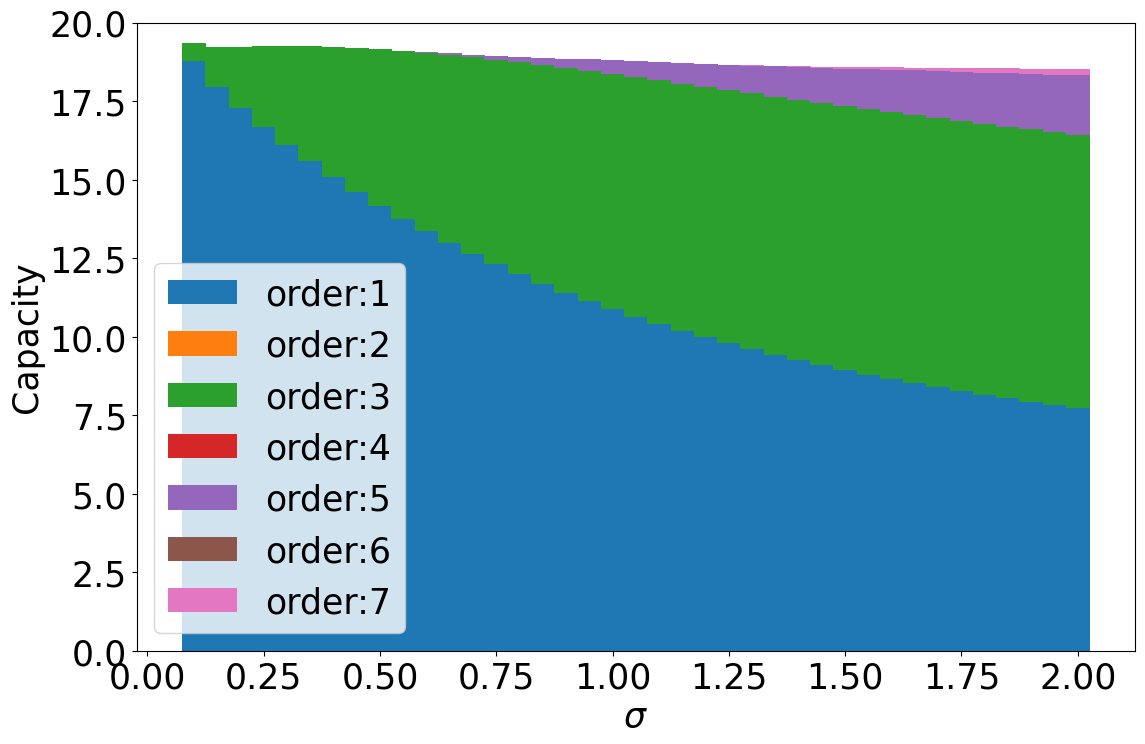

In [27]:

plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(12,8))
bottom=np.zeros(39)
#print(sigmas)

for i in range(7):
    plt.bar(sigmas.cpu().numpy(),ipcs[:,i].cpu().numpy(),bottom=bottom,width=0.051,label=f"order:{i+1}")
    bottom+=ipcs[:,i].cpu().numpy()
    
#plt.grid(True)
plt.ylim(0,20)
#plt.title("ipcs-sigma, D=3, N=20")
plt.xlabel(r"$\sigma$")
plt.ylabel("Capacity")
plt.legend()
plt.tight_layout()


if 0:
    plt.savefig("./graphs/ipcs_sigma_3din.eps")
    plt.savefig("./graphs/ipcs_sigma_3din.png")
if 1:
    plt.savefig("./graphs/slide/ipcs_sigma_3din.eps")
    plt.savefig("./graphs/slide/ipcs_sigma_3din.png")
    plt.savefig("./graphs/slide/ipcs_sigma_3din.svg")

In [ ]:

rhos = torch.linspace(0.1,1.2,23)

ipcs=torch.tensor(())
for rho in rhos:
    ipc=[]
    fn = r"20N_3din_%.2f_rho"%(rho)
    
    ipc = torch.load(f"./experiments/ipcs/{fn}_ipc.pt")
    capacities = ipc.val
    totCapacity = float(torch.sum(capacities))
    print("totoal capacity:",totCapacity)
    
    c_1st = ipc.ipc_by_degree(1)
    c_2nd = ipc.ipc_by_degree(2)
    c_3rd = ipc.ipc_by_degree(3)
    c_4th = ipc.ipc_by_degree(4)
    c_5th = ipc.ipc_by_degree(5)
    c_6th = ipc.ipc_by_degree(6)
    c_7th = ipc.ipc_by_degree(7)
    
    """
    print("2nd order ipc:",float(c_2nd))
    print("3rd order ipc:",float(c_3rd))
    print("4th order ipc:",float(c_4th))
    print("5th order ipc:",float(c_5th))
    """
    ipc_by_deg = torch.tensor([c_1st,c_2nd,c_3rd,c_4th,c_5th,c_6th,c_7th])
    ipcs = torch.cat((ipcs,ipc_by_deg.unsqueeze(0)),0)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


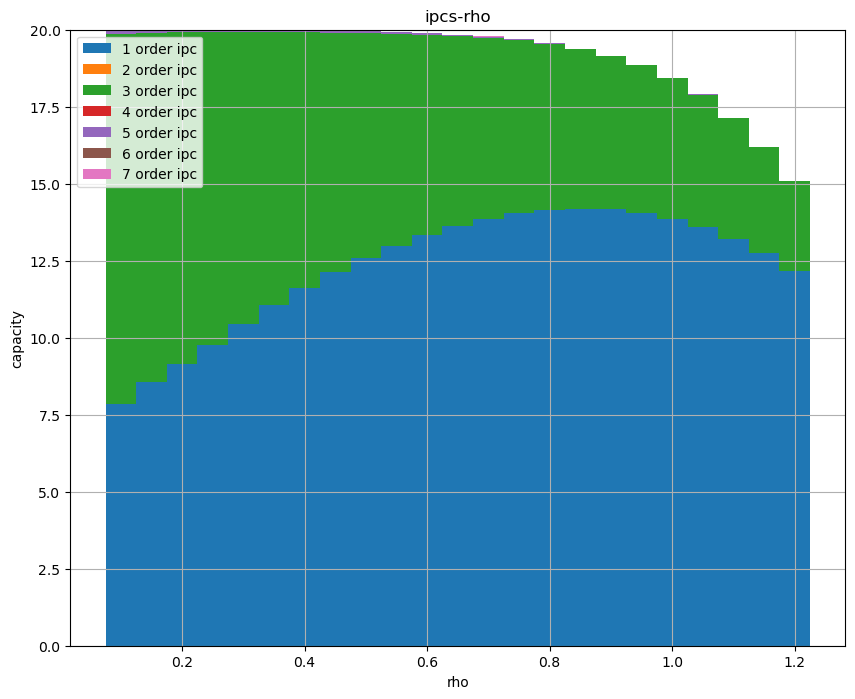

In [8]:
plt.figure(figsize=(10,8))
bottom=np.zeros(23)

for i in range(7):
    plt.bar(rhos.cpu().numpy(),ipcs[:,i].cpu().numpy(),bottom=bottom,width=0.05,label=f"{i+1} order ipc")
    bottom+=ipcs[:,i].cpu().numpy()
    
plt.grid(True)
plt.ylim(0,20)
plt.title("ipcs-rho")
plt.xlabel("rho")
plt.ylabel("capacity")
plt.legend()

plt.savefig("./graphs/ipcs_rho.eps")
plt.savefig("./graphs/ipcs_rho.png")


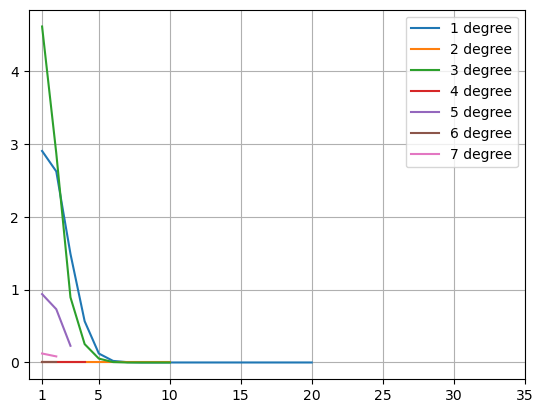

In [10]:
ipc_tau_spread = ESN.ipc_tau_spread(ipc=ipc,mode="sum")


degrees = range(len(ipc_tau_spread))
#degrees = [1,2,3,4]
#degrees = [1,3,4]

for deg in degrees:
    plt.plot(np.arange(1,ipc_tau_spread[deg].shape[0]+1),ipc_tau_spread[deg].cpu().numpy(),label=f"{deg+1} degree")
plt.legend()
plt.xticks([1]+list(np.arange(5,40,5)))
plt.grid()
plt.show()

In [11]:
ipc.maxddset

array([[ 1, 20],
       [ 2, 10],
       [ 3, 10],
       [ 4,  4],
       [ 5,  3],
       [ 6,  2],
       [ 7,  2]])

In [2]:
# sigma
# by input dimension

sigmas = torch.linspace(0.1,2.0,39)

ipcs_indim=torch.tensor(())
for sigma in sigmas:
    ipc=[]
    
    fn = r"20N_3din_%.2f_s"%(sigma)    
    ipc = torch.load(f"./experiments/ipcs/{fn}_ipc.pt",weights_only=False)
    ipc.in_dim[:60]=[[0]]*20+[[1]]*20+[[2]]*20
    
    for i,dimls in enumerate(ipc.in_dim):
        ipc.in_dim[i] = list(set(dimls))
    ipc = ESN.IPC(ipc.val,ipc.delay,ipc.degree,ipc.in_dim,ipc.maxddset)
    capacities = ipc.val
    totCapacity = float(torch.sum(capacities))
#    print("totoal capacity:",totCapacity)
    i1=ipc.ipc_by_indim([0])
    i2=ipc.ipc_by_indim([1])
    i3=ipc.ipc_by_indim([2])
    i12=ipc.ipc_by_indim([0,1])
    i13=ipc.ipc_by_indim([0,2])
    i23=ipc.ipc_by_indim([1,2])
    i123=ipc.ipc_by_indim([0,1,2])
    
    ipc_by_indim = torch.tensor([i1,i2,i3,i12,i13,i23,i123])
    ipcs_indim = torch.cat((ipcs_indim,ipc_by_indim.unsqueeze(0)),0)



In [27]:
print(ipc_by_indim)
print(torch.sum(ipc_by_indim))
print(totCapacity)
#print(ipc.in_dim)

tensor([3.0576, 2.5701, 2.9228, 2.7273, 2.7872, 1.8415, 2.6154],
       device='cuda:0')
tensor(18.5219, device='cuda:0')
18.521938943490262


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1200x800 with 0 Axes>

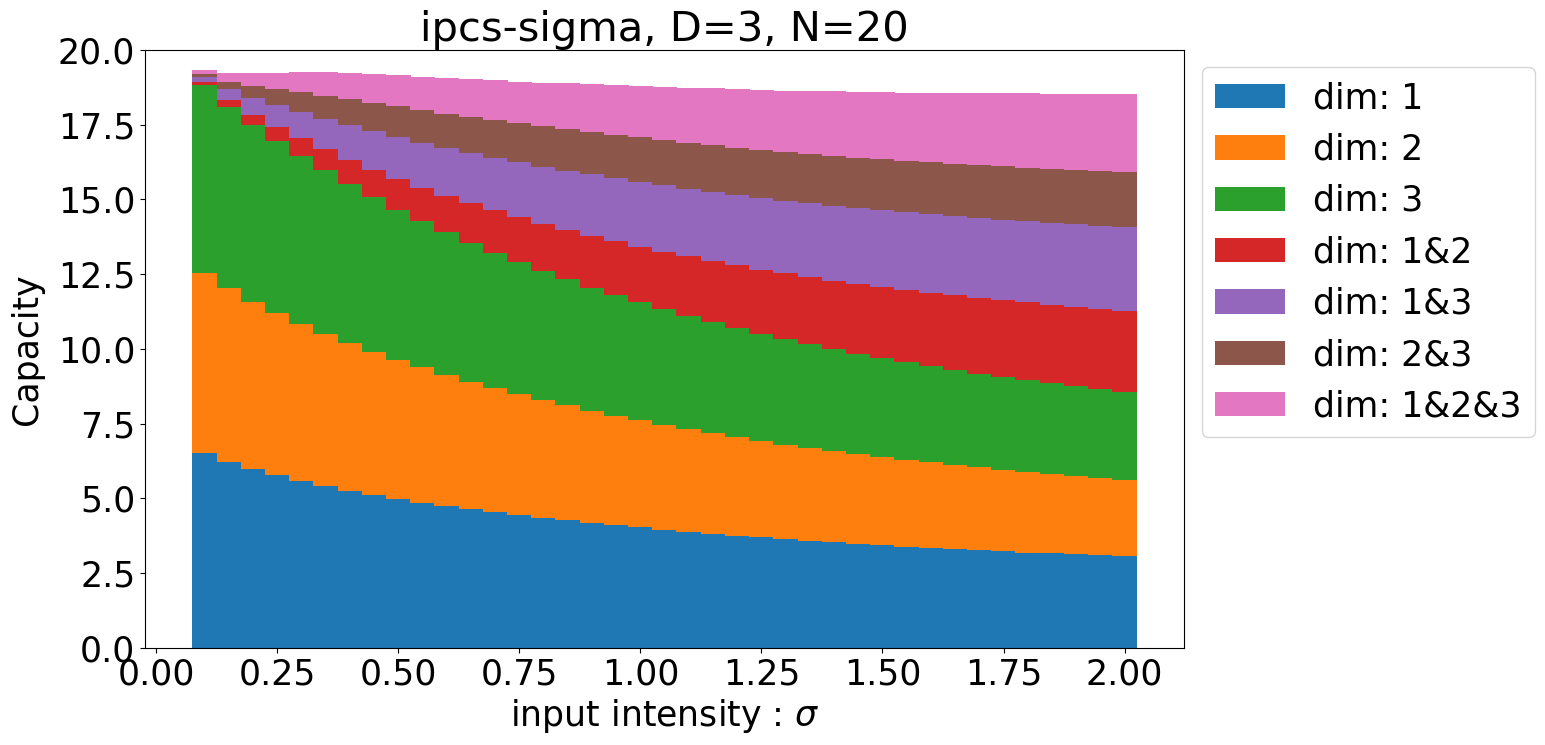

In [10]:

plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(12,8))
plt.figure(figsize=(16,8))
bottom=np.zeros(39)
#print(sigmas)
l=["1","2","3","1&2","1&3","2&3","1&2&3"]
for i in range(7):
    plt.bar(sigmas.cpu().numpy(),ipcs_indim[:,i].cpu().numpy(),bottom=bottom,width=0.051,label=f"dim: {l[i]}")
    bottom+=ipcs_indim[:,i].cpu().numpy()
    
plt.grid(False)
plt.ylim(0,20)
plt.title("ipcs-sigma, D=3, N=20")
plt.xlabel(r"input intensity : $\sigma$")
plt.ylabel("Capacity",labelpad=10)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()

if 0:
    plt.savefig("./graphs/ipcs_sigma_3din_indim.eps")
    plt.savefig("./graphs/ipcs_sigma_3din_indim.png")
if 0:
    plt.savefig("./graphs/slide/ipcs_sigma_3din_indim.eps")
    plt.savefig("./graphs/slide/ipcs_sigma_3din_indim.png")
    plt.savefig("./graphs/slide/ipcs_sigma_3din_indim.svg")
if 1:
    plt.savefig("./graphs/slide/ipcs_sigma_3din_indim_rev.eps")
    plt.savefig("./graphs/slide/ipcs_sigma_3din_indim_rev.png")
    plt.savefig("./graphs/slide/ipcs_sigma_3din_indim_rev.svg")